<html>
<h1 style="text-align:center;color:brown;font-size:500%">Wine Quality</h1>
</html>

<html>
<h1 style="text-align:left;color:red;font-size:200%">Table of Contents : </h1>
</html>

  * [Data Manipulation](#sec1)
       * [Importing Dataset](#sec1.1)
       * [Dataset View](#sec1.2)
       * [Dataset Information](#sec1.3)
       * [Summary Statistics](#sec1.4)
       * [Checking for unique values in integer type attribute](#sec1.5)
       * [Checking for missing values in each column](#sec1.6)
       * [percentage of missing values in each column](#sec1.7)
       
  * [Data Visualization](#sec2)
       * [Missing Value Plot](#sec2.1)
       * [Automated EDA](#sec2.2)
       * [Box plot for each continuous variavles](#sec2.3)
       * [Density plot of each continuous variable after removing outliers](#sec2.4)
       * [Box plot of each continuous variable after removing outliers](#sec2.5)
       * [Heatmap](#sec2.6)
       * [Bar Plot of each variable show label distribution of target variable](#sec2.7)
       * [Pie chart of target Variable](#sec2.8)
       * [Count Plot of target variable](#sec2.9)
       * [SMOTE(Synthetic Minority Oversampling Technique)](#sec2.10)
       
  * [Feature Selection](#sec3)
       * [Feature Importance Graph](#sec3.1)
       
  * [Splitting our dataset into train and test set](#sec4)
  
  * [Feature Scaling](#sec5)
       
  * [Modeling](#sec6)
       * [Decision Tree](#sec6.1)
       * [KNN](#sec6.2)
       * [Naive Bayes](#sec6.3)
       * [Support Vector Classifier](#sec6.4)
       * [Random Forest](#sec6.5)
       * [Xb-Boost](#sec6.6)
       
  * [Model Comparison](#sec7)
       * [Maximum Accuracies in each Column ](#sec7.1)
       * [Minimum Accuracies in each Column ](#sec7.2)

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries 

<html>
<img src="https://newrelic.com/sites/default/files/wp_blog_inline_files/shutterstock_1352528811.jpg" alt="Computer man" style="width:150px;height:100px;"/>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#imported different libraries where we will be working with.

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [3]:
df=pd.read_csv("WineQT.csv")

### Dataset View <a class="anchor" id="sec1.2"></a>

In [4]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

### Dataset Information <a class="anchor" id="sec1.3"></a>

Here we can see that all the data types are in float type except 'quality' which is in integer type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Summary Statistics <a class="anchor" id="sec1.4"></a>

In [6]:
df.describe().style.background_gradient()

### Checking for unique values in all attribute <a class="anchor" id="sec1.5"></a>

Different numbers of distint values in each attribute.our target varibale is quality and there are six distint values or six different types of wine in quality attribute.

In [7]:
df.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [8]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

Here I am Changing the range of quality variable from 3-8 to 0-5.

In [9]:
df['quality']=df['quality'].map({3:0,4:1,5:2,6:3,7:4,8:5})

### Checking for missing values in each column <a class="anchor" id="sec1.6"></a>

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### percentage of missing values in each column <a class="anchor" id="sec1.7"></a>

In [11]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

fixed acidity          0.00 %
volatile acidity       0.00 %
citric acid            0.00 %
residual sugar         0.00 %
chlorides              0.00 %
free sulfur dioxide    0.00 %
total sulfur dioxide   0.00 %
density                0.00 %
pH                     0.00 %
sulphates              0.00 %
alcohol                0.00 %
quality                0.00 %
Id                     0.00 %
dtype: float64


## Data Visualization <a class="anchor" id="sec2"></a>

### Missing Value Plot <a class="anchor" id="sec2.1"></a>

In [12]:
import missingno as msno

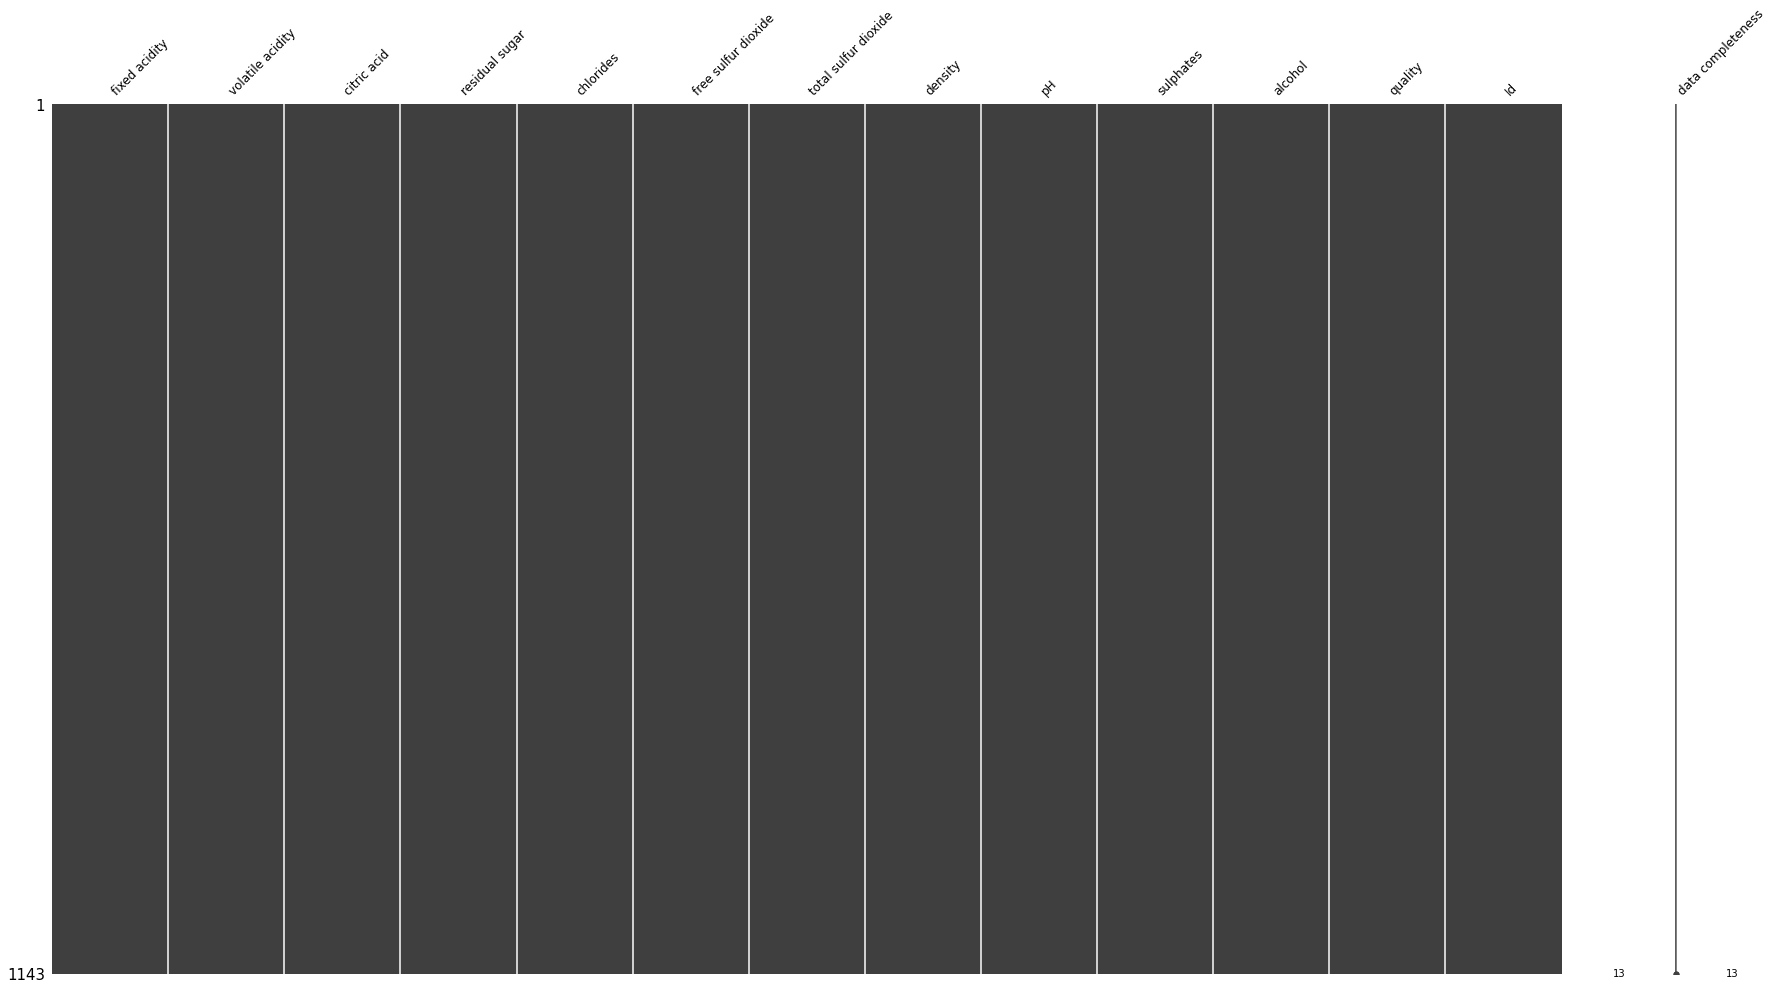

In [13]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Automated EDA  <a class="anchor" id="sec2.2"></a>

Here we use AUTOMATED EDA by using DataPrep.EDA library function which is the fastest and the easiest EDA (Exploratory Data Analysis) tool in Python. It allows us to understand a Pandas DataFrame with a few lines of code in seconds.

In [14]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



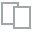
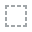
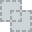
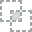
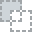
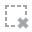
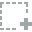
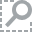
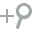
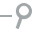
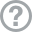
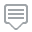
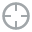
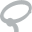
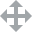
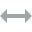
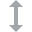
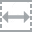
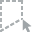
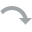
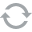
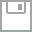
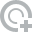
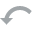
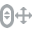
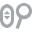
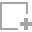
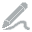
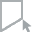
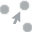
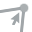
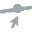

In [15]:
from dataprep.eda import plot
plot(df)

DataPrep Report
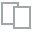
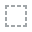
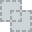
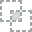
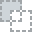
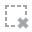
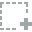
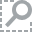
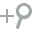
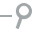
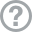
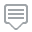
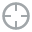
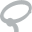
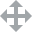
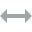
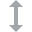
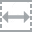
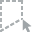
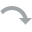
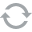
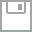
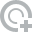
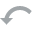
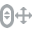
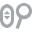
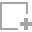
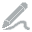
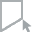
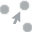
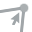
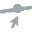

In [16]:
from dataprep.eda import create_report
create_report(df)

From the above graph we can see that there are a lot of attributes which are positively or negatively distributed.

### Box Plot <a class="anchor" id="sec2.3"></a>

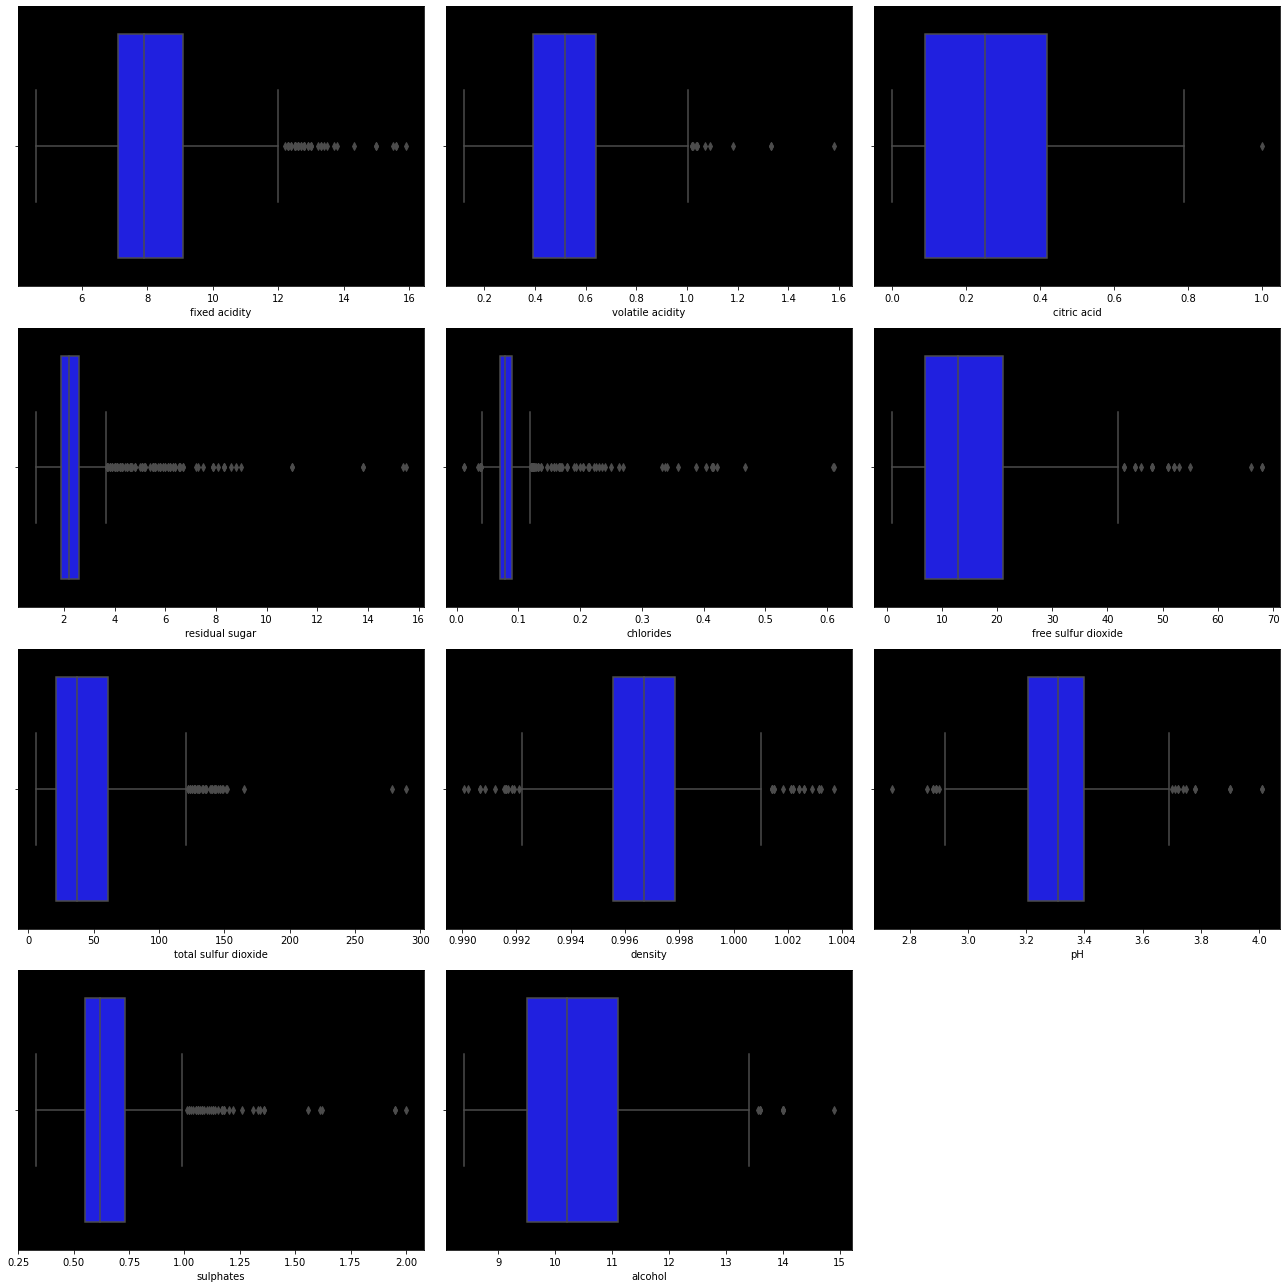

In [17]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [18]:
from scipy.stats.mstats import winsorize

In [19]:
var=list(df.select_dtypes(include=['float64']).columns)

In [20]:
for col_name in var:    
  df[col_name] = winsorize(df[col_name], limits=[0.1, 0.1],inclusive=(True, True))

### Data distribution after treating outliers <a class="anchor" id="sec2.4"></a>

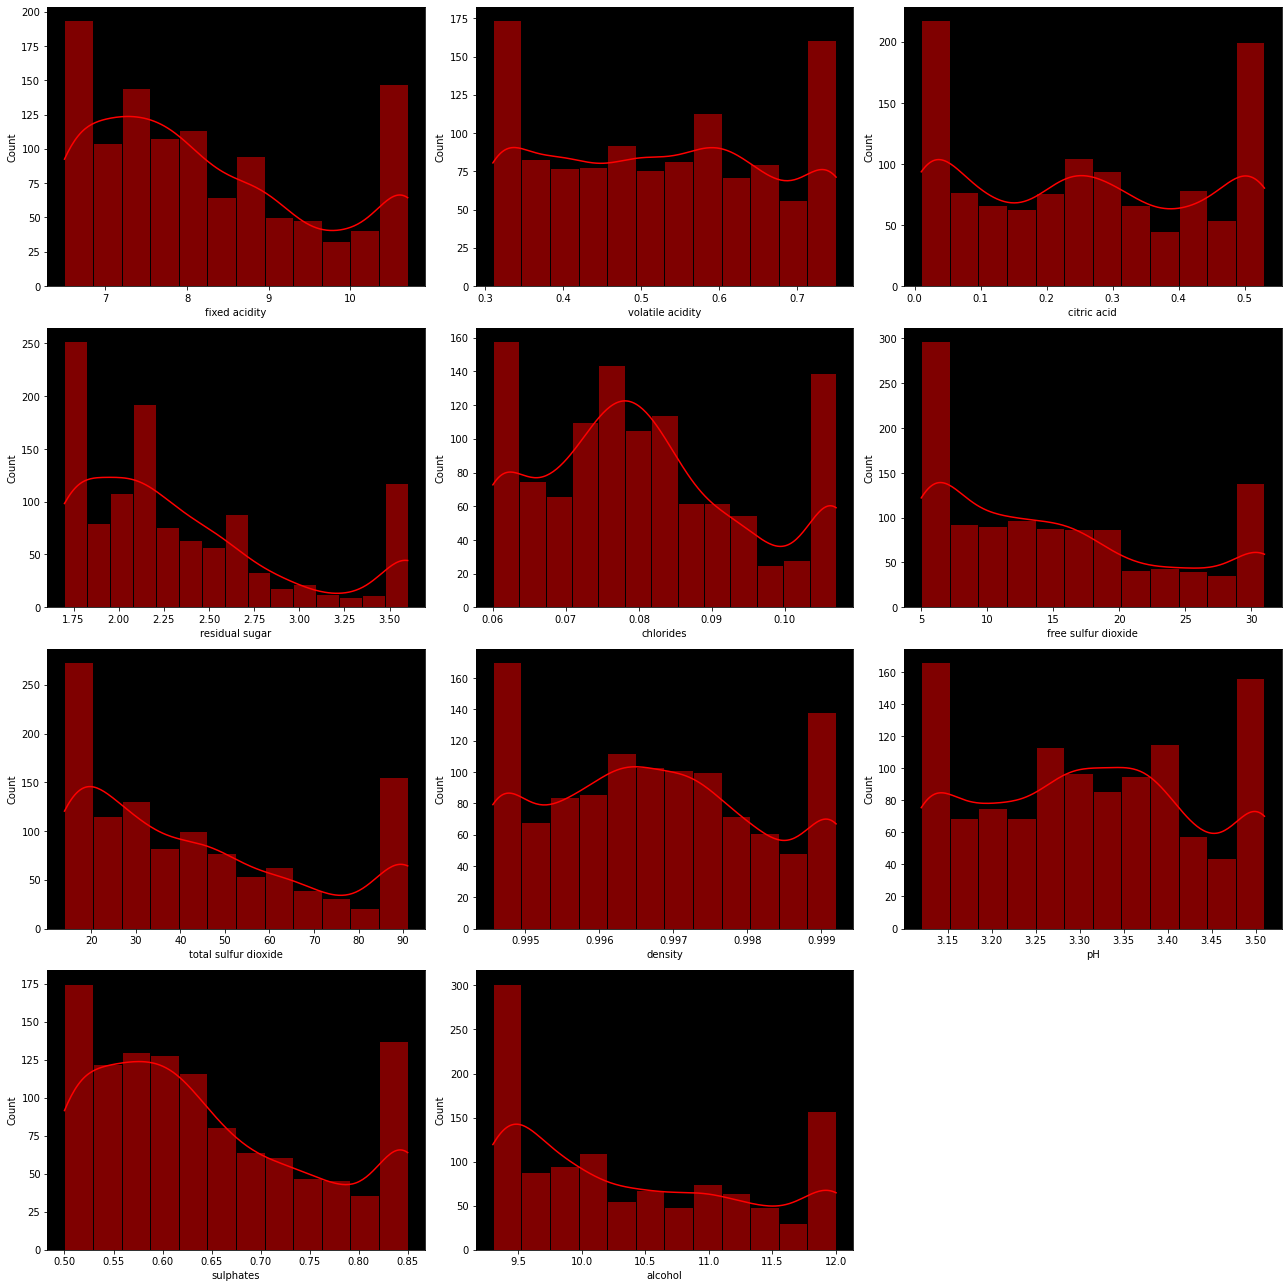

In [21]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Now the Distribution plots look more symmetrical after treating the outliers.

### Box Plot after treating outliers <a class="anchor" id="sec2.5"></a>

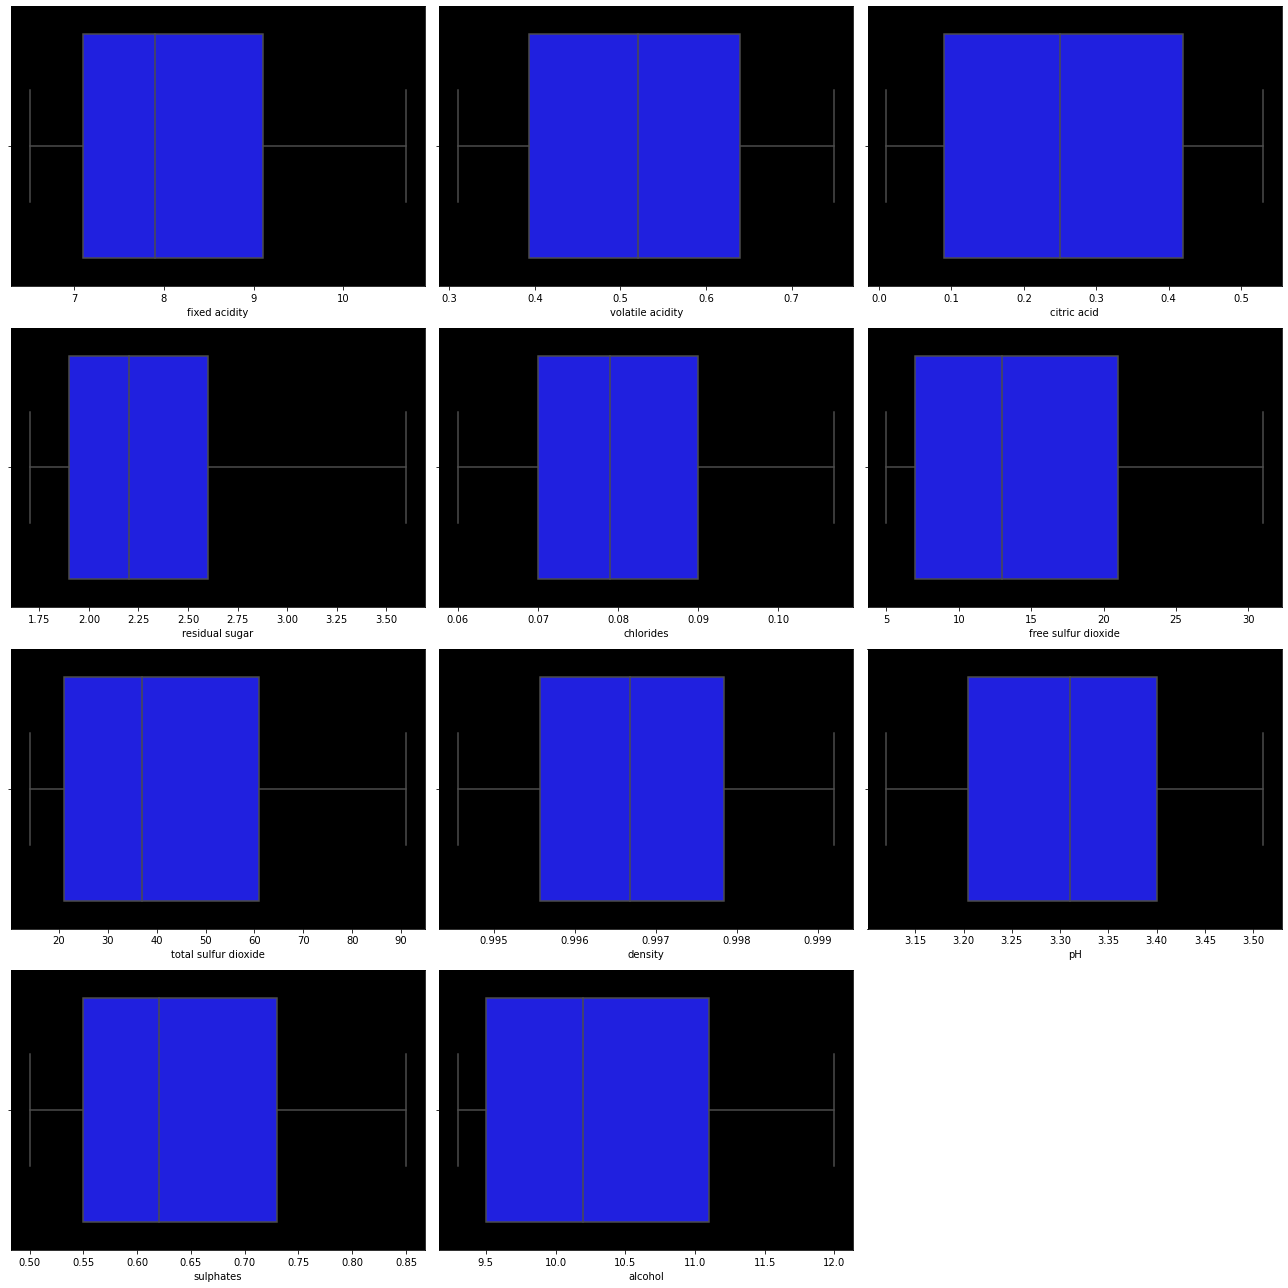

In [22]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

Now our Box plots look better after treating the outliers.

### Heatmap <a class="anchor" id="sec2.6"></a>

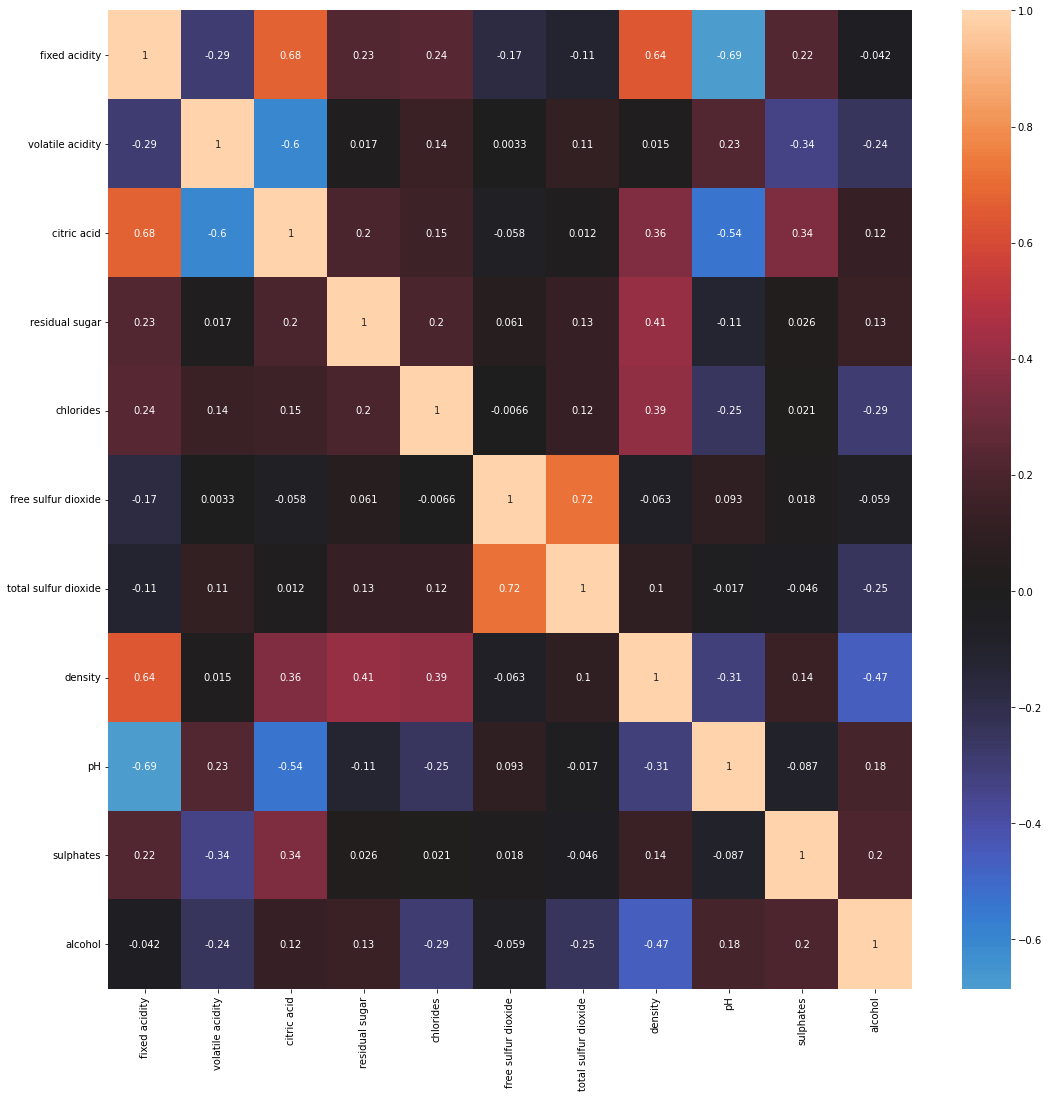

In [23]:
plt.figure(figsize=(18,18))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

With this heatmap plot we can interpret which variable is how much correlated to other variable.

### Bar Plot <a class="anchor" id="sec2.7"></a>

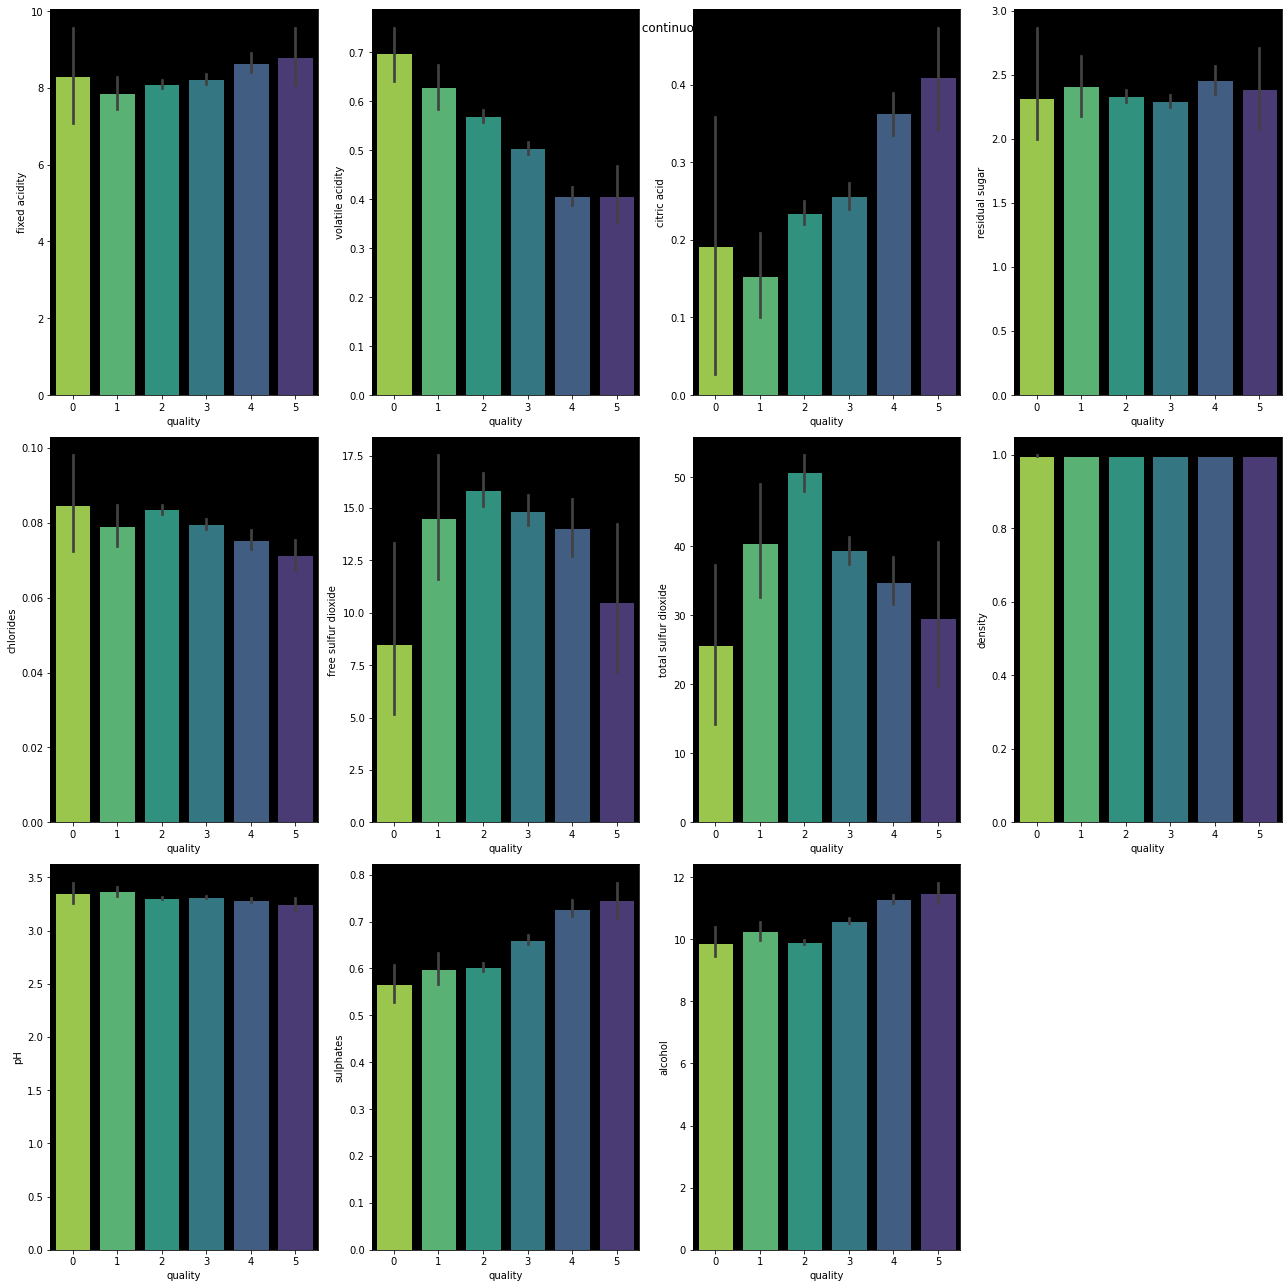

In [24]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=df,x='quality', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Here we can look at each plot and see the contribution of each feature to the different quality of wine .

### Pie Chart shows that the target class is Unbalanced.<a class="anchor" id="sec2.8"></a>

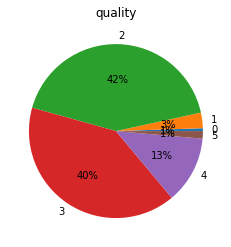

In [25]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality')
plt.show()

Pie chart tells us that most of samples in the target class are quality 2,quality 3 and quality 4.This is a case of Unbalanced data so I will SMOTE technique to oversample the data.

### Count plot shows that the target class is imbalanced <a class="anchor" id="sec2.9"></a>

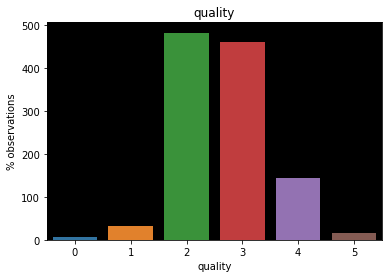

In [26]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('quality')
plt.show()

In [27]:
X=df.iloc[:,0:-2]
y=df.iloc[:,-2]

### SMOTE(Synthetic Minority Oversampling Technique)<a class="anchor" id="sec2.10"></a>

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm=SMOTE()

In [30]:
X,y=sm.fit_resample(X,y)

### Count plot after applying SMOTE 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


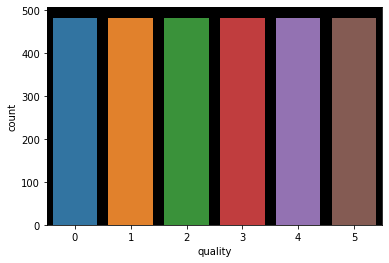

In [31]:
sns.countplot(y)
plt.show()

### Splitting our dataset into train and test set <a class="anchor" id="sec4"></a>

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

### Feature Scaling <a class="anchor" id="sec5"></a>

Here we are going to use Standardization.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling <a class="anchor" id="sec6"></a>

### Performance Measures for Multi-Class

In [36]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [37]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Decision Tree <a class="anchor" id="sec6.1"></a>

In [38]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.76%
Model F1-Score : 77.83%
Cross Val Accuracy: 76.01 %
Cross Val Standard Deviation: 1.38 %
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       102
           1       0.80      0.84      0.82        93
           2       0.59      0.60      0.60        95
           3       0.57      0.56      0.56        99
           4       0.78      0.83      0.80        92
           5       0.92      0.89      0.90        99

    accuracy                           0.78       580
   macro avg       0.78      0.78      0.78       580
weighted avg       0.78      0.78      0.78       580



### KNN <a class="anchor" id="sec6.2"></a>

In [39]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.76%
Model F1-Score : 77.83%
Cross Val Accuracy: 76.01 %
Cross Val Standard Deviation: 1.38 %
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       102
           1       0.80      0.84      0.82        93
           2       0.59      0.60      0.60        95
           3       0.57      0.56      0.56        99
           4       0.78      0.83      0.80        92
           5       0.92      0.89      0.90        99

    accuracy                           0.78       580
   macro avg       0.78      0.78      0.78       580
weighted avg       0.78      0.78      0.78       580



### Naive Bayes <a class="anchor" id="sec6.3"></a>

In [40]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 55.69%
Model F1-Score : 57.44%
Cross Val Accuracy: 51.64 %
Cross Val Standard Deviation: 1.56 %
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       135
           1       0.42      0.40      0.41       102
           2       0.46      0.51      0.48        86
           3       0.29      0.44      0.35        63
           4       0.42      0.52      0.47        79
           5       0.84      0.70      0.77       115

    accuracy                           0.56       580
   macro avg       0.56      0.54      0.54       580
weighted avg       0.61      0.56      0.57       580



### Support Vector Classifier <a class="anchor" id="sec6.4"></a>

In [41]:
classifier=SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.93%
Model F1-Score : 78.79%
Cross Val Accuracy: 77.39 %
Cross Val Standard Deviation: 2.58 %
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       114
           1       0.87      0.85      0.86        99
           2       0.52      0.60      0.56        84
           3       0.51      0.59      0.54        83
           4       0.78      0.79      0.79        96
           5       1.00      0.92      0.96       104

    accuracy                           0.78       580
   macro avg       0.78      0.77      0.77       580
weighted avg       0.80      0.78      0.79       580



### Random Forest <a class="anchor" id="sec6.5"></a>

In [42]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 81.03%
Model F1-Score : 81.48%
Cross Val Accuracy: 81.06 %
Cross Val Standard Deviation: 1.61 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.95      0.87      0.91       106
           2       0.66      0.64      0.65        98
           3       0.47      0.57      0.52        80
           4       0.87      0.79      0.82       107
           5       0.92      0.98      0.95        90

    accuracy                           0.81       580
   macro avg       0.81      0.80      0.81       580
weighted avg       0.82      0.81      0.81       580



### Xg Boost <a class="anchor" id="sec6.6"></a>

In [43]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 76.21%
Model F1-Score : 76.78%
Cross Val Accuracy: 77.61 %
Cross Val Standard Deviation: 1.15 %
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       103
           1       0.88      0.83      0.85       103
           2       0.54      0.63      0.58        83
           3       0.43      0.46      0.44        92
           4       0.75      0.74      0.75        98
           5       0.97      0.92      0.94       101

    accuracy                           0.76       580
   macro avg       0.76      0.75      0.76       580
weighted avg       0.78      0.76      0.77       580



### Model Comparison <a class="anchor" id="sec7"></a>

In [44]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

#### Maximum Accuracies in each Column <a class="anchor" id="sec7.1"></a>

In [45]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

#### Minimum Accuracies in each Column <a class="anchor" id="sec7.2"></a>

In [46]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")